In [1]:
#29/7/24 Creates 5 fold predictive models using Hepatox MorganFP data and Neural Networks
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pandas as pd
import numpy as np
import math
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys
sys.path.insert(1, '/Users/james/Documents/Honours/Python')
from Function_Repo import metriccalc
from Function_Repo import nnmetrics

seed = 81
#Data import
datasets = []
index = []
targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/Hepatoxicity/Structure/hepatoxMorganfp.csv')
targetdata = targetdata.iloc[:,1:]
#Splitting data into 5 folds 
dfarray = targetdata.to_numpy()
#First set aside 20% of the data for a final validation at the end
dfarray, tempset = train_test_split(dfarray, test_size=0.2, random_state=seed, stratify = targetdata['Toxicity_Value'])

size = len(dfarray) / 5
splitsize = math.ceil(size)
empty = [[] for _ in range(5)]
splits = []
for list in empty:
    splits.append(list)

loops = 0
currsplit = 0
#Results in a list of 5 lists that each contain 1/5 of the targetdata
for row in dfarray:
    splits[currsplit].append(row)
    if loops == splitsize:
        loops = 0
        currsplit = currsplit + 1
    loops = loops + 1

folds = []
for split in splits:
    temp = pd.DataFrame(split)
    folds.append(temp)

In [2]:
pd.set_option('display.max_columns', None)
targetdata

Toxicity_Value  0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0                  0  0  0  1  0  0  0  0  0  0  0   0   0   0   0   0   0   
1                  0  0  1  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
2                  1  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
3                  0  0  1  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
4                  1  0  1  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
...              ... .. .. .. .. .. .. .. .. .. ..  ..  ..  ..  ..  ..  ..   
2884               0  0  0  0  0  0  0  0  0  0  0   1   0   0   0   0   0   
2885               0  0  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   
2886               0  0  0  1  0  0  0  0  0  0  0   0   0   0   0   0   0   
2887               0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
2888               1  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

      16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
2884   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2885   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2886   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2887   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2888   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

      34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  \
0      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
2884   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2885   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2886   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2887   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2888   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

      52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  \
0      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2      0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
3      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
2884   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   
2885   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2886   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2887   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2888   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

      70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  \
0      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1      0   0   0   0   0  

Model: "nnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2048, 1)]         0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 4097)              8394753   
                                                                 
 dense_1 (Dense)             (None, 1)                 4098      
                                                                 
Total params: 8,398,851
Trainable params: 8,398,851
Non-trainable params: 0
_________________________________________________________________
8/8 [==============================] - 0s 4ms/step


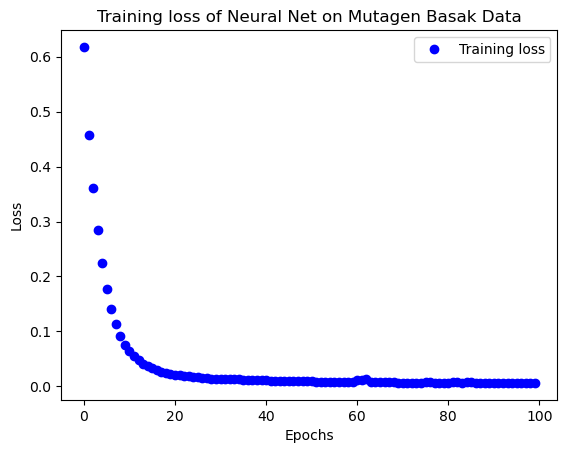

optimal mcc of 0.48931598632313905 at a threshold of 0.66


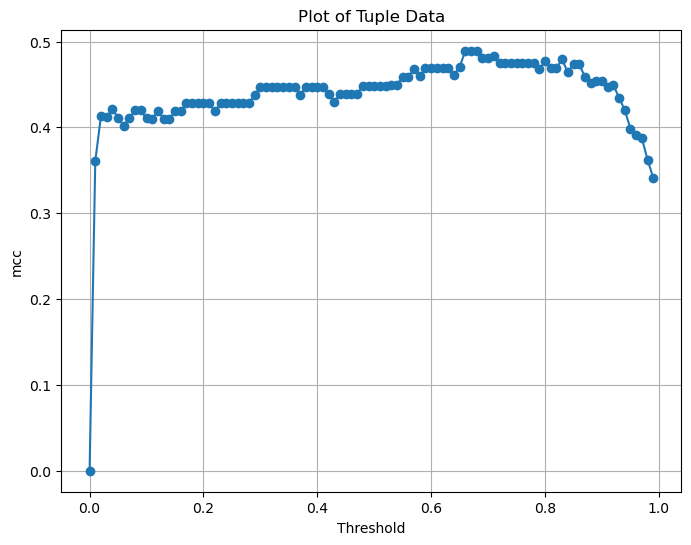

8/8 [==============================] - 0s 4ms/step


for model 1 validation metrics of:
positives in data 110
negatives in data 122 

fn count = 34
tn count = 85
tp count = 76
fp count = 37 

net accuracy = 0.6939655172413793
positive accuracy = 0.6909090909090909
negative accuracy = 0.6967213114754098 

fpr = 0.30327868852459017
tpr = 0.6909090909090909 

f1 score = 0.6816143497757847
mcc = 0.3872410486334347
cohen Kappa = 0.3871111772585206
Model: "nnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2048, 1)]         0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 4097)              8394753   
                                                                 
 dense_3 (Dense)             (None, 1)                 4098     

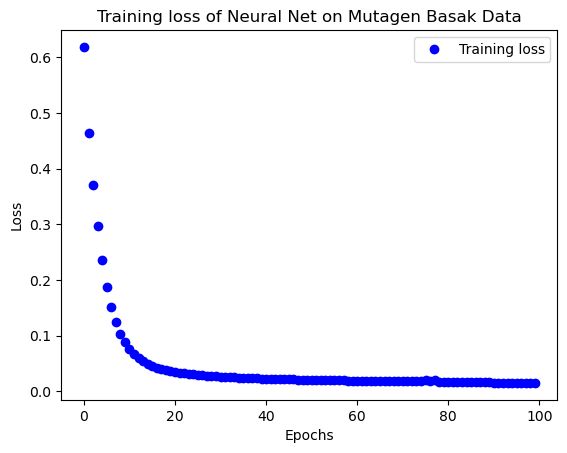

optimal mcc of 0.49296153537926 at a threshold of 0.2


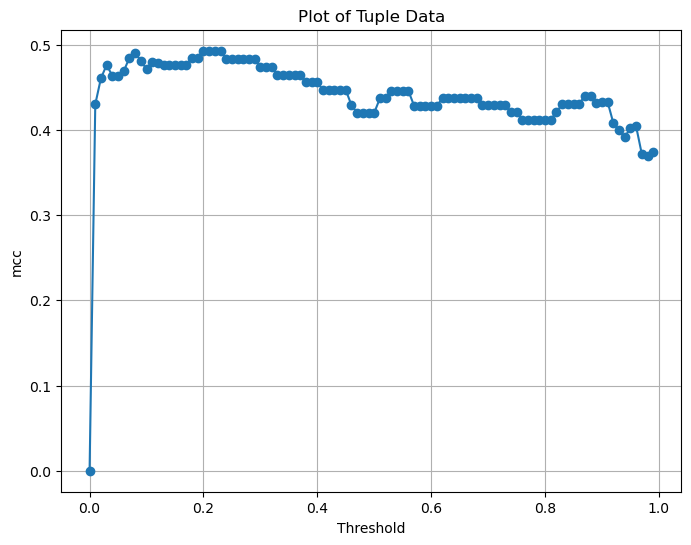

8/8 [==============================] - 0s 5ms/step


for model 2 validation metrics of:
positives in data 119
negatives in data 113 

fn count = 26
tn count = 74
tp count = 93
fp count = 39 

net accuracy = 0.7198275862068966
positive accuracy = 0.7815126050420168
negative accuracy = 0.6548672566371682 

fpr = 0.34513274336283184
tpr = 0.7815126050420168 

f1 score = 0.7410358565737052
mcc = 0.44044373529959063
cohen Kappa = 0.4376491646778043
Model: "nnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2048, 1)]         0         
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 4097)              8394753   
                                                                 
 dense_5 (Dense)             (None, 1)                 4098    

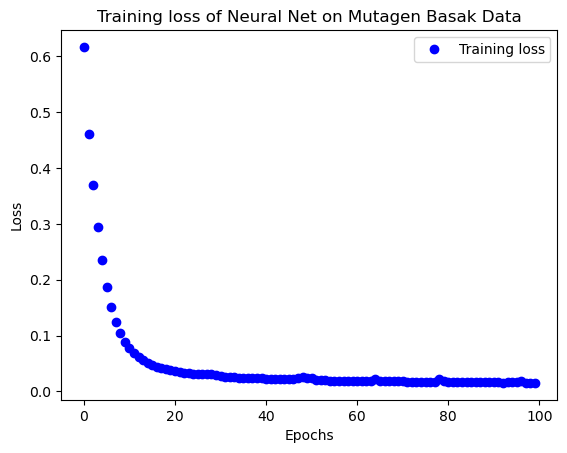

optimal mcc of 0.4905483563097293 at a threshold of 0.99


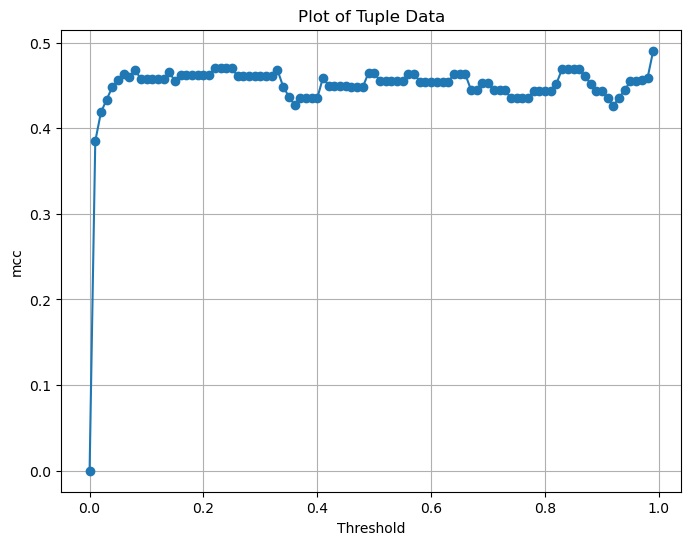

8/8 [==============================] - 0s 4ms/step
for model 3 validation metrics of:
positives in data 113
negatives in data 119 

fn count = 54
tn count = 101
tp count = 59
fp count = 18 

net accuracy = 0.6896551724137931
positive accuracy = 0.5221238938053098
negative accuracy = 0.8487394957983193 

fpr = 0.15126050420168066
tpr = 0.5221238938053098 

f1 score = 0.6210526315789474
mcc = 0.3936547118609967
cohen Kappa = 0.37386610690456556


Model: "nnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 2048, 1)]         0         
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 4097)              8394753   
                                                                 
 dense_7 (Dense)             (None, 1)                 4098      
                                                                 
Total params: 8,398,851
Trainable params: 8,398,851
Non-trainable params: 0
_________________________________________________________________
8/8 [==============================] - 0s 4ms/step


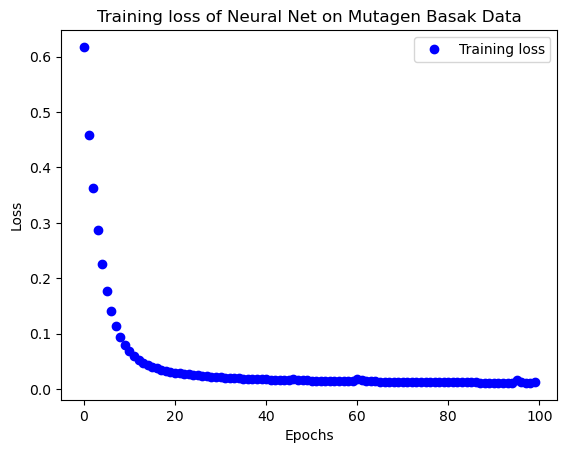

optimal mcc of 0.376976134052877 at a threshold of 0.38


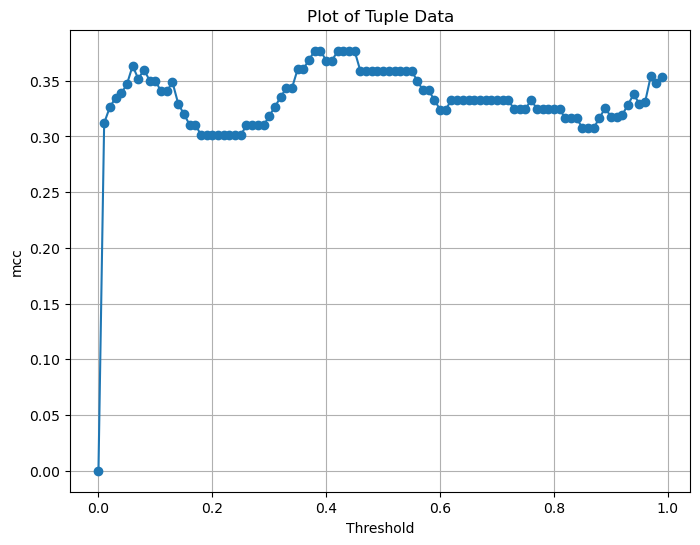

8/8 [==============================] - 0s 10ms/step


for model 4 validation metrics of:
positives in data 120
negatives in data 112 

fn count = 34
tn count = 80
tp count = 86
fp count = 32 

net accuracy = 0.7155172413793104
positive accuracy = 0.7166666666666667
negative accuracy = 0.7142857142857143 

fpr = 0.2857142857142857
tpr = 0.7166666666666667 

f1 score = 0.7226890756302521
mcc = 0.43076012023304106
cohen Kappa = 0.43069601427721593
Model: "nnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 2048, 1)]         0         
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 4097)              8394753   
                                                                 
 dense_9 (Dense)             (None, 1)                 4098    

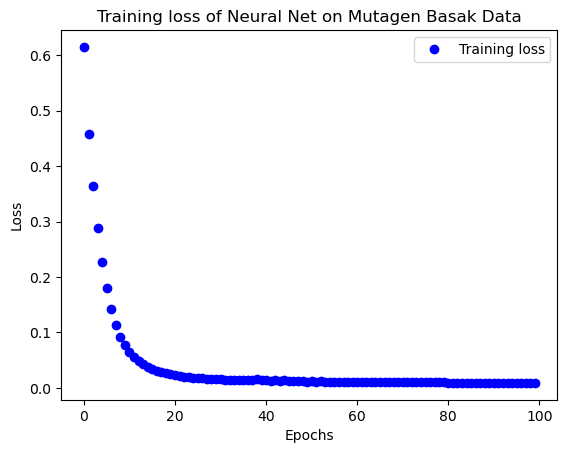

optimal mcc of 0.44072389999802875 at a threshold of 0.01


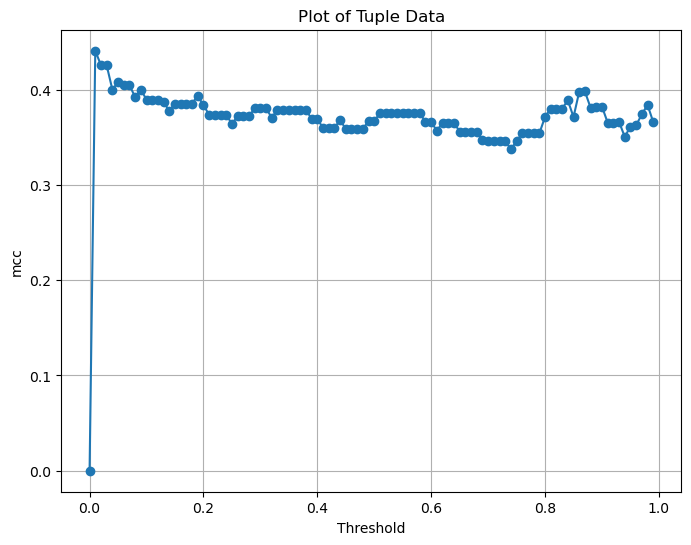

8/8 [==============================] - 0s 5ms/step
for model 5 validation metrics of:
positives in data 126
negatives in data 103 

fn count = 10
tn count = 51
tp count = 116
fp count = 52 

net accuracy = 0.7292576419213974
positive accuracy = 0.9206349206349206
negative accuracy = 0.49514563106796117 

fpr = 0.5048543689320388
tpr = 0.9206349206349206 

f1 score = 0.7891156462585034
mcc = 0.46789510067224926
cohen Kappa = 0.43185274109643856


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
model_list = []
validlist = []
testdat = []
threshlist = []
#For loop that uses each fold once for valid/testing and the rest for training
#Each 'split' in the range corresponds to the set used for test/validation with the other 4 for training
iteration = 1
for split in range(0,5):
    #Set creation
    trainlist = [df for i, df in enumerate(folds) if i != split]
    trainset = pd.concat(trainlist, axis=0)
    #Splits test set into a test and validation set
    testset, validset = train_test_split(folds[split], test_size=0.5, random_state=seed)
    
    ytrain = trainset[0].values
    xtrain = trainset.iloc[:, 1:]
    
    ytest = testset[0].values
    xtest = testset.iloc[:, 1:]
    
    yvalid = validset[0].values
    xvalid = validset.iloc[:, 1:]
    

    # Determines layer size and input/output
    # Here it turns the 334 one hot encoded features to 42
    keras.utils.set_random_seed(seed)
    tf.config.experimental.enable_op_determinism()
    length = len(xtrain.columns)
    temp = length
    # Encoder Creation
    enc_in = keras.Input(shape=(length, 1))
    x = keras.layers.Flatten()(enc_in)
    # Additional encoder layers
    #Uses Huang's formula to determine model size
    
    x = keras.layers.Dense(4097, activation="relu")(x)
    #x = keras.layers.Dense(155, activation="relu")(x)
    #x = keras.layers.Dense(31, activation="relu")(x)
    
    enc_out = keras.layers.Dense(1, activation="sigmoid")(x)
    nnet = keras.Model(enc_in, enc_out, name='nnet')
    # Optimiser
    optimise = tf.keras.optimizers.Adam(learning_rate=0.0001)
    
    nnet.compile(optimise, loss='binary_crossentropy')
    nnet.summary()
    
    ytrain = np.array(ytrain)
    epochs = 100
    batchsize = 16
    losshistory = []

    minloss = 1
    bestepoch = 0
    for epoch in range(epochs):
        verb = 1
        if epoch % 50 != 0:
            verb = 0
        logs = nnet.fit(
        xtrain,
        ytrain,
        verbose = verb,
        epochs=1,
        batch_size=batchsize),
        validation_split=0.2,
        loss = logs[0].history['loss'][0]
        losshistory.append(loss)
        if loss < minloss:
            minloss = loss
            bestepoch = epoch

    model_list.append(nnet)
    
    preds = nnet.predict(xtest)
    
    epochcount = range(epochs)
    plt.figure()
    plt.plot(epochcount, losshistory, 'bo', label='Training loss')
    plt.title('Training loss of Neural Net on Mutagen Basak Data')
    plt.legend()

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    
    #acc curve creation
    acclist = []
    thresholdlist = []
    maxval = 0
    bestthresh = 0
    for threshold in np.arange(0, 1, 0.01):
        newval = nnmetrics(preds, ytest, threshold)[12]
        acclist.append(newval)
        thresholdlist.append(threshold)
        if newval > maxval:
            maxval = newval
            bestthresh = threshold
    threshlist.append(bestthresh)
    testdat.append(maxval)
    y_values = acclist
        
    #check models onto validation set, printing various metrics
    preds = nnet.predict(xvalid)
    results = nnmetrics(preds, yvalid, bestthresh)
    validlist.append(results)
    print('for model', iteration, 'validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1], '\n')
    print('fn count =', results[2])
    print('tn count =', results[3])
    print('tp count =', results[4])
    print('fp count =', results[5], '\n')
    print('net accuracy =', results[6])
    print('positive accuracy =', results[7])
    print('negative accuracy =', results[8], '\n')
    print('fpr =', results[9])
    print('tpr =', results[10], '\n')
    print('f1 score =',results[11])
    print('mcc =',results[12])
    print('cohen Kappa =',results[13])
    iteration = iteration + 1

In [4]:
y = tempset[:, 0]
x = tempset[:, 1:]

iter = 1
loops =0
validdat = []
for model in model_list:
    predictions = []
    x = np.asarray(x).astype(np.float32)
    preds = model.predict(x)
    predictions.append(preds)
    
    results = nnmetrics(preds, y, threshlist[loops])
    validdat.append(results[12])
    print('model', iter, 'validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1], '\n')
    print('fn count =', results[2])
    print('tn count =', results[3])
    print('tp count =', results[4])
    print('fp count =', results[5], '\n')
    print('net accuracy =', results[6])
    print('positive accuracy =', results[7])
    print('negative accuracy =', results[8], '\n')
    print('fpr =', results[9])
    print('tpr =', results[10], '\n')
    print('f1 score =',results[11])
    print('mcc =',results[12])
    print('cohen Kappa =',results[13], '\n')
    iter = iter + 1
    
    loops = loops + 1

19/19 [==============================] - 0s 6ms/step
model 1 validation metrics of:
positives in data 293
negatives in data 285 

fn count = 101
tn count = 207
tp count = 192
fp count = 78 

net accuracy = 0.6903114186851211
positive accuracy = 0.6552901023890785
negative accuracy = 0.7263157894736842 

fpr = 0.2736842105263158
tpr = 0.6552901023890785 

f1 score = 0.6820603907637656
mcc = 0.3823966432411911
cohen Kappa = 0.38118592772467913 

19/19 [==============================] - 0s 4ms/step
model 2 validation metrics of:
positives in data 293
negatives in data 285 

fn count = 69
tn count = 183
tp count = 224
fp count = 102 

net accuracy = 0.7041522491349481
positive accuracy = 0.764505119453925
negative accuracy = 0.6421052631578947 

fpr = 0.35789473684210527
tpr = 0.764505119453925 

f1 score = 0.7237479806138933
mcc = 0.4099450376790004
cohen Kappa = 0.4072541470260156 

19/19 [==============================] - 0s 4ms/step
model 3 validation metrics of:
positives in data 293


In [5]:
#get x and y values for the final validation set
import statistics

toxvals = []
fingerprints = []
for row in tempset:
    toxvals.append(row[0])
    fingerprints.append(row[1:])

#calculates consensus of models on each fingerprint in the final validation set
consensuslist = []
predictions = []

for fp in fingerprints:
    consensus = -1
    fp = fp.reshape(1, -1)
    fp = np.asarray(fp).astype('float32')
    #appends each model's prediction to a list
    predlist = []
    for model in model_list:
        preds = model.predict(fp, verbose = 0)
        predlist.append(preds)
    predictions.append(predlist)
    
    #finds number of 0s in the prediction list
    zercount = 0
    loops = 0
    for modelpreds in predlist:
        if modelpreds < threshlist[loops]:
            zercount = zercount + 1
    loops = loops + 1
    
    #as there are 5 models, if there are less than 3 0s predicted, the consensus is 1
    if zercount < 3 :
        consensus = 1
    else:
        consensus = 0
    consensuslist.append(consensus)
    
#calculate and print metrics
results = metriccalc(consensuslist, toxvals)
print('validation metrics of:')
print('positives in data', results[0])
print('negatives in data', results[1], '\n')
print('fn count =', results[2])
print('tn count =', results[3])
print('tp count =', results[4])
print('fp count =', results[5], '\n')
print('net accuracy =', results[6])
print('positive accuracy =', results[7])
print('negative accuracy =', results[8], '\n')
print('fpr =', results[9])
print('tpr =', results[10], '\n')
print('f1 score =',results[11])
print('mcc =',results[12])
print('cohen Kappa =',results[13])

validation metrics of:
positives in data 293
negatives in data 285 

fn count = 80
tn count = 213
tp count = 213
fp count = 72 

net accuracy = 0.7370242214532872
positive accuracy = 0.726962457337884
negative accuracy = 0.7473684210526316 

fpr = 0.25263157894736843
tpr = 0.726962457337884 

f1 score = 0.7370242214532872
mcc = 0.4743308783905155
cohen Kappa = 0.47414917940553286


In [6]:
#0.463 mcc using huangs layering
#0.474 mcc using Hecht Nielson layering